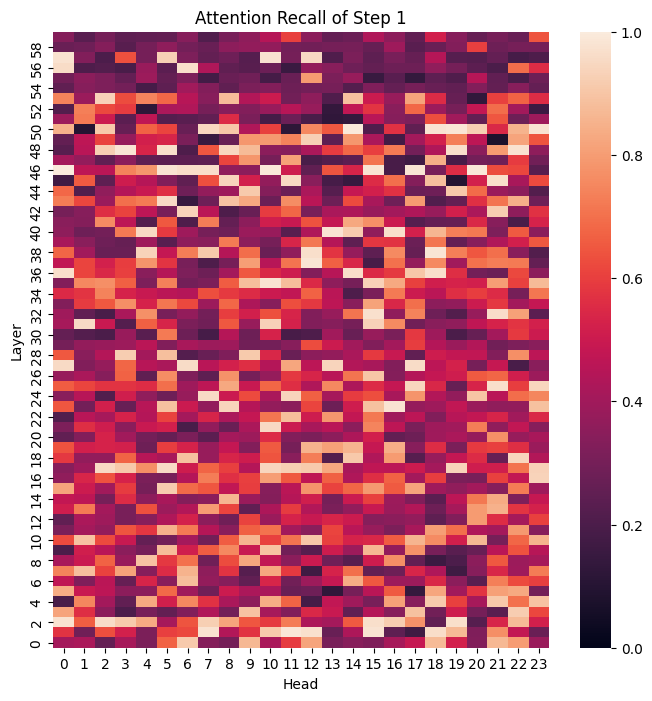

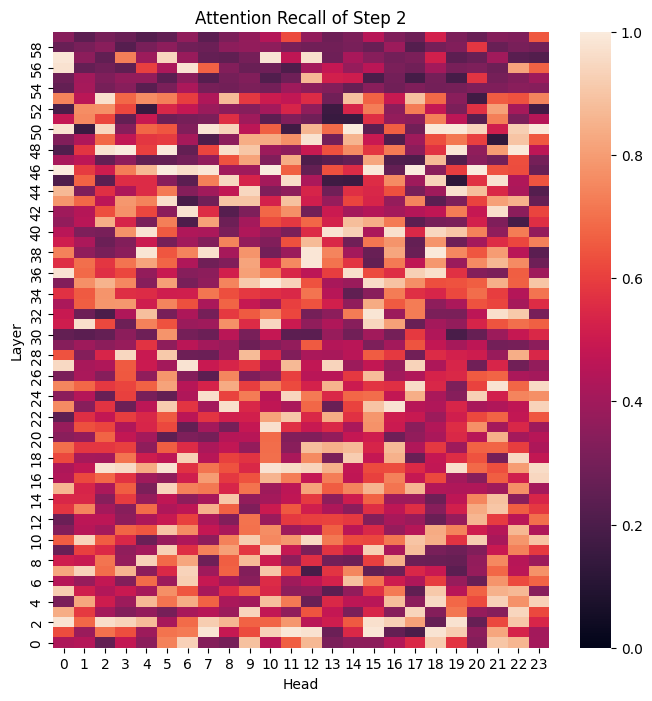

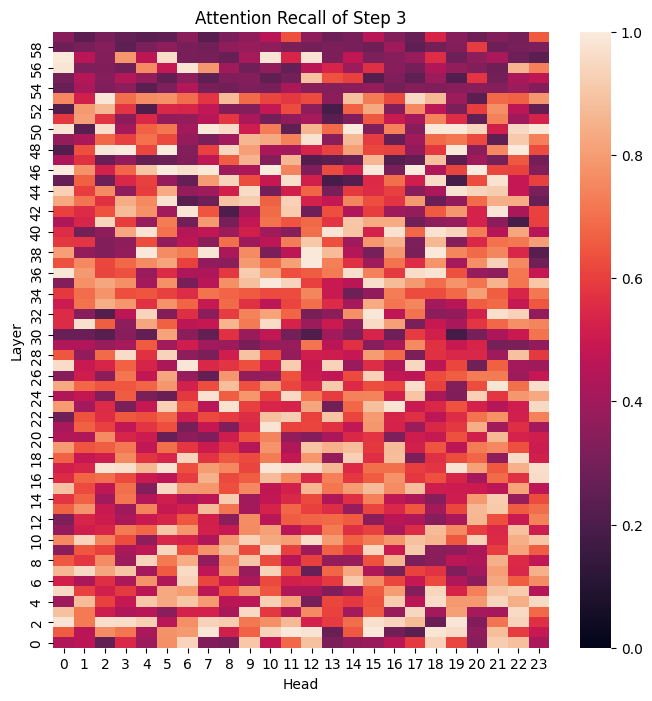

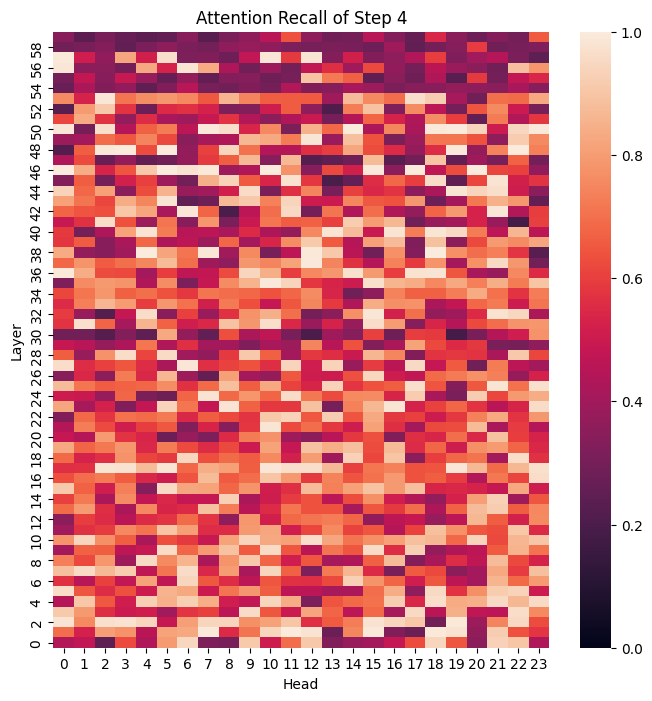

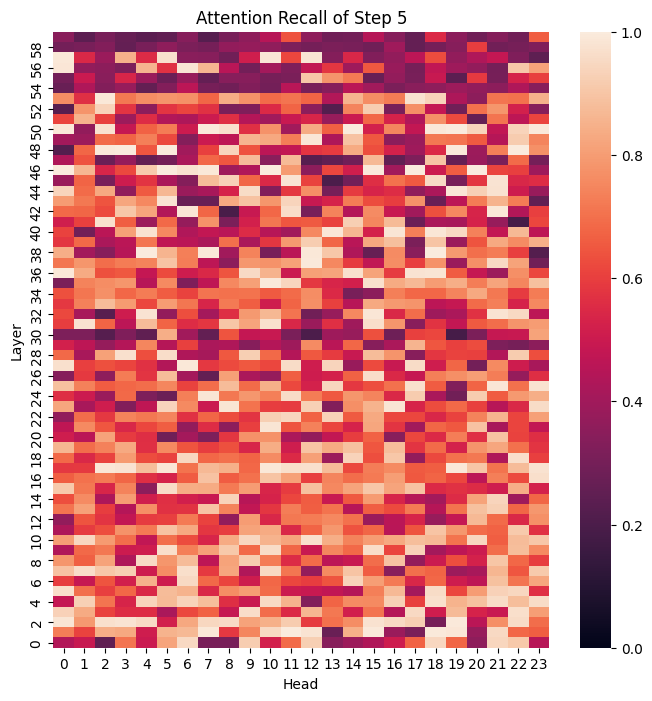

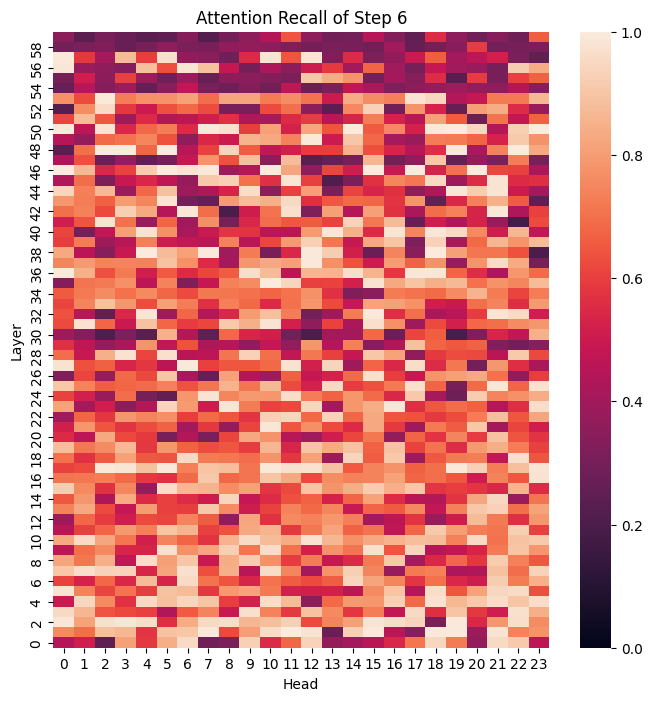

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display

def parse_log_file():
    results = []
    with open('log_recall.txt', 'r') as f:
        for line in f:
            match = re.search(r'step(\d+)_layer(\d+)_head(\d+)_window_diff', line)
            if match:
                step = int(match.group(1))
                layer = int(match.group(2))
                head = int(match.group(3))
                recall_match = re.search(r's recall: ([\d.]+)', line)
                recall = float(recall_match.group(1)) if recall_match else None
                results.append([step, layer, head, recall])
    return np.array(results)

def plot_attention_recalls(data):
    # 获取唯一的step值
    steps = np.unique(data[:, 0])
    
    # 对每个step创建一个热力图
    for step in steps:
        step_data = data[data[:, 0] == step]
        
        # 创建矩阵存储recall值
        n_layers = int(np.max(step_data[:, 1])) + 1
        n_heads = int(np.max(step_data[:, 2])) + 1
        recall_matrix = np.zeros((n_layers, n_heads))
        
        # 填充recall值
        for item in step_data:
            layer, head, recall = int(item[1]), int(item[2]), item[3]
            recall_matrix[layer, head] = recall
        
        # 创建热力图
        plt.figure(figsize=(8, 8))
        sns.heatmap(recall_matrix, 
                    cmap='rocket',
                    vmin=0, 
                    vmax=1.0,
                    cbar_kws={'label': ''})
        
        plt.title(f'Attention Recall of Step {int(step)}')
        plt.xlabel('Head')
        plt.ylabel('Layer')
        
        # 反转y轴使得层号从上到下递增
        plt.gca().invert_yaxis()
        
        # 显示图片
        display(plt.gcf())
        plt.close()

# 运行代码
data = parse_log_file()
plot_attention_recalls(data)